In [11]:

import numpy as np
import matplotlib.pyplot as plt
from astroquery.gaia import Gaia
perform_query = False 

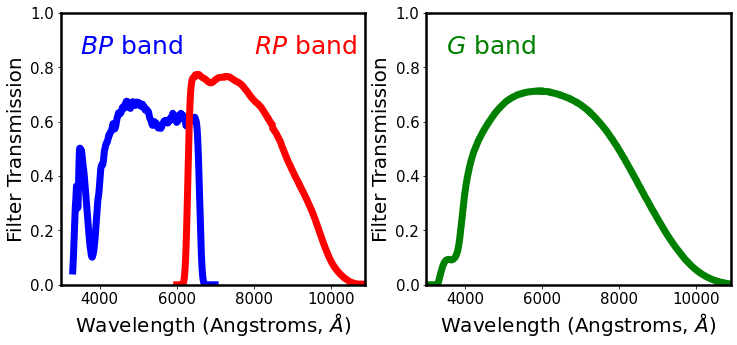

In [3]:
# Load Gaia DR2 passbands from the internet. 
# The file was downloaded from [url], edited so that it loads more easily, then posted to github.
from astropy.io import ascii
url = "https://raw.githubusercontent.com/jasoncurtis/Lessons/main/GaiaDR2_RevisedPassbands.dat"
gaia = ascii.read(url, delimiter=r'\s')  
wave = gaia['wavelength_nm']*10 # Let's store the wavelength column to a new variable called "wave", and let's convert it from nm to angstroms by multiplying by 10.

##############################
# Plot wavelength vs G band

# To make the plot look nicer, we need to trim off the ends, and only focus on the portion of the wavelength where the filter works.
# We can do this with the np.where() function, which pulls out the pieces of a column of data (an array) that match your criteria.

ib = np.where((wave>3300) & (wave<7000)) # Here, we want wavelengths bigger than 3300 Angstroms and less than 7000 angstroms.
# we save the locations/indices in the array into the variable "ib" which I named to mean "indices for the blue filter"
ir = np.where((wave>6000) & (wave<17000)) # indices for the red filter

##############################
# Create the figure space:
# First, we create a canvas for our figure. Doing this lets us control how big the figure will be and what shape it is.
# the object "figure" is the canvas, and the objects "axis_G" and "axis_BP_RP" are the axes where the data will be plotted.
##############################
figure, (axis_BP_RP, axis_G) = plt.subplots(1, 2, figsize=(12,5))

##############################
# Plot G-band filter curve:
##############################
axis_G.plot(wave,gaia['Gband'],c='green',linewidth=7)
# Add a label on the figure
axis_G.text(3500,0.85,r'$G$ band', fontsize=25,c='green') # We can add text to the figure.
# Add axis labels:
axis_G.set_xlabel('Wavelength (Angstroms, $\AA$)', fontsize = 20)  # the $$ dollar signs turn on "math mode" which lets us use fancy symbols and greek letters.
axis_G.set_ylabel('Filter Transmission', fontsize = 20)
# Adjust x and y limits:
axis_G.set_xlim(3000,10900)  # Sets the x-axis range. Notice that it isn't ax.xlim() like the previous plot, but now it is ax.set_xlim(). 
axis_G.set_ylim(0,1)  # Sets the y-axis range

##############################
# Plot BP-band and RP-band filter curves
##############################
axis_BP_RP.plot(wave[ib[0]],gaia['BP'][ib[0]],c='blue',linewidth=7) # to use those indices, you have to attach it to the end of the data column you want like this: [ib[0]] 
axis_BP_RP.plot(wave[ir[0]],gaia['RP'][ir[0]],c='red',linewidth=7) # 
axis_BP_RP.text(3500,0.85,r'$BP$ band', fontsize=25,c='blue')
axis_BP_RP.text(8000,0.85,r'$RP$ band', fontsize=25,c='red')
axis_BP_RP.set_xlabel('Wavelength (Angstroms, $\AA$)', fontsize = 20)
axis_BP_RP.set_ylabel('Filter Transmission', fontsize = 20)
axis_BP_RP.set_ylim(0,1)
axis_BP_RP.set_xlim(3000,10900)

##############################
# Make plot look nice
# These commands make the borders thicker and and numbers bigger.
# I basically copy and paste this block of test for every figure I make.
##############################
# Parameters
axis_border_width = 2.5
fontsize_axis_labels = 15
# axis_G
axis_G.tick_params(axis='both', which='major', labelsize=fontsize_axis_labels)
axis_G.spines['top'].set_linewidth(axis_border_width)
axis_G.spines['left'].set_linewidth(axis_border_width)
axis_G.spines['right'].set_linewidth(axis_border_width)
axis_G.spines['bottom'].set_linewidth(axis_border_width)
# axis_BP_RP
axis_BP_RP.tick_params(axis='both', which='major', labelsize=fontsize_axis_labels)
axis_BP_RP.spines['top'].set_linewidth(axis_border_width)
axis_BP_RP.spines['left'].set_linewidth(axis_border_width)
axis_BP_RP.spines['right'].set_linewidth(axis_border_width)
axis_BP_RP.spines['bottom'].set_linewidth(axis_border_width)

##############################
# Finish the plot
plt.show()

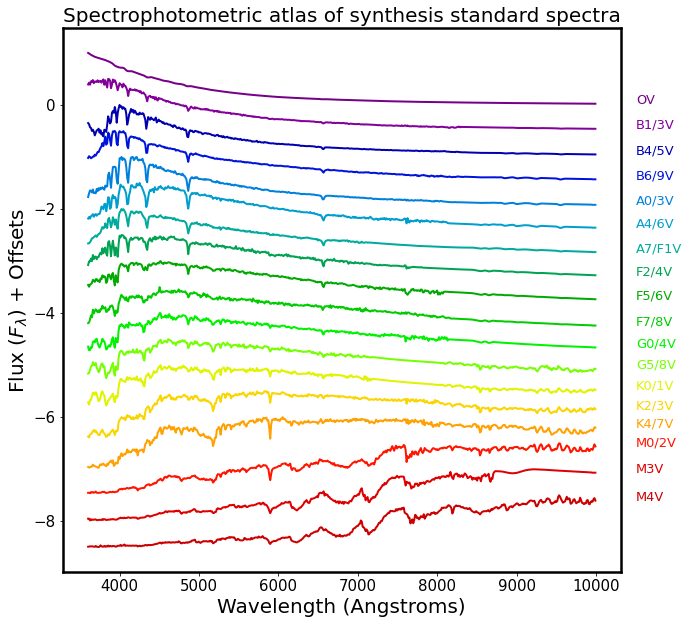

In [4]:
from astropy.io import fits

figure, axis = plt.subplots(figsize=(10,10))
number_of_spectra = 18
#colors = plt.cm.rainbow(np.linspace(0,1,number_of_spectra))
colors = plt.cm.nipy_spectral(np.linspace(0,1,number_of_spectra+2))

for i in range(number_of_spectra):
  number = str(i+1)
  number = str(i+1+48)
  if len(number) == 1:
    number = '0'+number
  file = 'http://cdsarc.u-strasbg.fr/ftp/cats/VII/102/fits/f'+number+'.fit'
  data_open = fits.open(file)
  header = data_open[0].header
  #print(header['OBJECT'])
  spectrum = data_open[0].data
  wave = np.arange(header['NAXIS1'])*header['CDELT1'] + header['CRVAL1']
  axis.plot(wave, spectrum/max(spectrum)-0.5*i, color=colors[i+1], linewidth=2)
  SpT = header['OBJECT']
  if (len(SpT) == 4) | (len(SpT) == 5):
    SpT = SpT[0:2]+'/'+SpT[2:]
  
  axis.text(10500,spectrum[-1]/max(spectrum)-0.5*i,SpT,fontsize=13,color=colors[i+1])


fontsize_labels = 20
axis.set_title('Spectrophotometric atlas of synthesis standard spectra',fontsize=fontsize_labels)
axis.set_xlabel('Wavelength (Angstroms)', fontsize=fontsize_labels)
axis.set_ylabel('Flux ($F_{\lambda}$) + Offsets', fontsize=fontsize_labels)

##############################
# Make plot look nice
##############################
# Parameters
axis_border_width = 2.5
fontsize_axis_labels = 15
# Modify axis
axis.tick_params(axis='both', which='major', labelsize=fontsize_axis_labels)
axis.spines['top'].set_linewidth(axis_border_width)
axis.spines['left'].set_linewidth(axis_border_width)
axis.spines['right'].set_linewidth(axis_border_width)
axis.spines['bottom'].set_linewidth(axis_border_width)

# Finish figure
plt.show()


Question − Using these figures as a guide, which star do you expect will have the largest  BP−RP  color?

Answer: Considering that O and B stars have high BP flux compared to their RP flux, I would expect the OV to have the largest BP-RP color.

In [5]:
maximum_distance = 50.0

# un-comment the two lines below and fill in the formula for converting distance to parallax. 

parallax_cutoff = 1e3 / maximum_distance # mas units
print(parallax_cutoff)

20.0


In [7]:
# The Gaia DR3 table is located here:
table_name_gaia = "gaiaedr3.gaia_source" # we will use the new EDR3 catalog

# we can load the "meta data" (information) about the catalog:
meta = Gaia.load_table(table_name_gaia)
#print(meta) # if you want to see what meta contains, uncomment and rerun
# print()
# It gives some basic information and says the table has 96 columns. That means there are 96 different kinds of data stored in this table. 

# The names of the data columns can be printed like this:
for column in meta.columns:
    print(column.name)

# We see some familiar quantities:
#  Positions: ra, dec
#  Parallax: related to the distance
#  Proper motion
#  radial_velocity
#  The apparent G magnitude: phot_g_mean_mag
#  The BP - RP color: bp_rp


# We also see many other quantities that we do not need at this time. 
# Fortunately, there is a way to select only the necessary columns, which will save us time and computer memory. 

Retrieving table 'gaiaedr3.gaia_source'
solution_id
designation
source_id
random_index
ref_epoch
ra
ra_error
dec
dec_error
parallax
parallax_error
parallax_over_error
pm
pmra
pmra_error
pmdec
pmdec_error
ra_dec_corr
ra_parallax_corr
ra_pmra_corr
ra_pmdec_corr
dec_parallax_corr
dec_pmra_corr
dec_pmdec_corr
parallax_pmra_corr
parallax_pmdec_corr
pmra_pmdec_corr
astrometric_n_obs_al
astrometric_n_obs_ac
astrometric_n_good_obs_al
astrometric_n_bad_obs_al
astrometric_gof_al
astrometric_chi2_al
astrometric_excess_noise
astrometric_excess_noise_sig
astrometric_params_solved
astrometric_primary_flag
nu_eff_used_in_astrometry
pseudocolour
pseudocolour_error
ra_pseudocolour_corr
dec_pseudocolour_corr
parallax_pseudocolour_corr
pmra_pseudocolour_corr
pmdec_pseudocolour_corr
astrometric_matched_transits
visibility_periods_used
astrometric_sigma5d_max
matched_transits
new_matched_transits
matched_transits_removed
ipd_gof_harmonic_amplitude
ipd_gof_harmonic_phase
ipd_frac_multi_peak
ipd_frac_odd_win

In [12]:
### YOU DO NOT NEED TO FIGURE OUT WHAT THIS CODE BLOCK DOES #####
### but you are welcome to inspect it if you'd like! ###
#################################################################

if perform_query == True:


# Let's ignore very faint stars with G > 18 magnitude
##############################
  Gmag_faint_limit = 14        # Ignore fainter stars by setting Gmag_cut = 18. You can also try Gmag_cut = 16.0. If you want everything try Gmag_cut = 22.0
##############################

# This sets up the query
  table_name_gaia = "gaiaedr3.gaia_source"
  column_names = "source_id, ra, dec, parallax, parallax_error, phot_g_mean_mag as Gmag, bp_rp, pmra, pmdec, dr2_radial_velocity as radial_velocity, dr2_radial_velocity_error as erv, ruwe"

  query_base = """SELECT
  {Columns_Queried}
  FROM {gaia_table}
  WHERE parallax>{parallax_minimum} AND 
  phot_g_mean_mag < {Gmag_Limit} AND
  parallax_over_error > 10 
  AND phot_g_mean_flux_over_error>50
  AND phot_rp_mean_flux_over_error>20
  AND phot_bp_mean_flux_over_error>20
  AND phot_bp_rp_excess_factor < 1.3+0.06*power(phot_bp_mean_mag-phot_rp_mean_mag,2)
  AND phot_bp_rp_excess_factor > 1.0+0.015*power(phot_bp_mean_mag-phot_rp_mean_mag,2)
  AND visibility_periods_used>8
  AND astrometric_chi2_al/(astrometric_n_good_obs_al-5)<1.44*greatest(1,exp(-0.4*(phot_g_mean_mag-19.5)))
  AND ruwe<1.2
  """

# The "ruwe" cut removes stars with poor astrometric solutions, typically wide binaries.
  query = query_base.format(gaia_table = table_name_gaia, Columns_Queried = column_names, Gmag_Limit = Gmag_faint_limit, parallax_minimum = 20.0)

# This launches the "job" which has the server gather the data
  job = Gaia.launch_job_async(query)
  print(job)
  # This downloads the data we want into the variable "gaia_data"
  gaia_nearby = job.get_results()

  print('Number of sources: ',len(gaia_nearby))
  print()
  gaia_nearby[0:5] # This prints the first five lines to screen

else: 
  from astropy.io import fits
  from astropy.table import Table
  url = "https://raw.githubusercontent.com/jasoncurtis/Lessons/blob/main/Gaia_50pc_sample.fit"  
  url = "https://github.com/jasoncurtis/Lessons/blob/main/Gaia_50pc_sample.fit?raw=true"
  gaia_open = fits.open(url)
  gaia_data = gaia_open[1].data
  gaia_nearby = Table({'source_id':gaia_data['Source'], 'ra':gaia_data['RA_ICRS'], 'dec':gaia_data['DE_ICRS'],
                 'parallax':gaia_data['Plx'], 'parallax_error':gaia_data['e_Plx'], 
                 'pmra':gaia_data['pmRA'], 'pmdec':gaia_data['pmDE'], 
                 'pmra_error':gaia_data['e_pmRA'], 'pmdec_error':gaia_data['e_pmDE'], 
                 'gmag':gaia_data['Gmag'], 'Gmag':gaia_data['Gmag'], 'e_Gmag':gaia_data['e_Gmag'],
                 'bp_rp':gaia_data['BP-RP'], 
                 'radial_velocity':gaia_data['RVDR2'],'radial_velocity_error':gaia_data['e_RVDR2']})


#parallax, parallax_error, phot_g_mean_mag as Gmag, bp_rp, pmra, pmdec, dr2_radial_velocity as radial_velocity, dr2_radial_velocity_error as erv, ruwe"                 

In [20]:
# How many stars are on our list? 

number_of_stars = len(gaia_nearby) # Use len() to calculate the number of items in a list.

print('Number of sources: ',number_of_stars)


Number of sources:  21447


In [14]:
# For example, let's print a summary of the Right Ascension coordinate (column "ra"):

gaia_nearby['ra']

# First, note that you can use either single-quotes or double-quotes, as long as the beginning/end match. 

# Second, there are 21,000 stars in our list, printing them all to screen would be a problem. 
# The notebook recognizes this and print a summary of the first 12 and last 12 entries.

46.613135424105224
47.29336525491694
43.1958678724688
44.30777209360578
47.90070740667656
46.77548689203329
41.784416283990545
43.165709186489785
42.98653737950994
43.34394291915119
44.031485207345426


In [15]:
# We could also ask for our own segment or slice of this array:

gaia_nearby['ra'][0:3] # This prints the three lines starting on row 0. In Python, we start counting at zero; so the second line is row 1, etc.

46.613135424105224
47.29336525491694
43.1958678724688


C:\Users\jfont\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


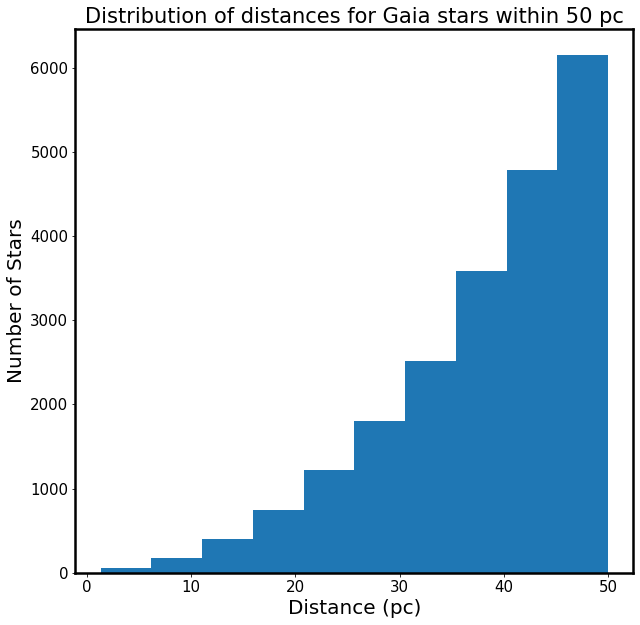

In [16]:
# Let's examine the distribution of distances. 
# We will assume that the inverse parallax is equal to distance.

# Create a figure
figure, axis = plt.subplots(figsize=(10,10))

# Calculate distance
distance = 1e3 / gaia_nearby['parallax']

# Plot the histogram of distances
axis.hist(distance)

# Add x/y-axis labels
axis.set_xlabel('Distance (pc)', fontsize=20)
axis.set_ylabel('Number of Stars', fontsize=20)

# Add title
axis.set_title('Distribution of distances for Gaia stars within 50 pc',fontsize=21)

# Make plot look nice
axis_border_width = 2.5
fontsize_axis_labels = 15
axis.tick_params(axis='both', which='major', labelsize=fontsize_axis_labels)
axis.spines['top'].set_linewidth(axis_border_width)
axis.spines['left'].set_linewidth(axis_border_width)
axis.spines['right'].set_linewidth(axis_border_width)
axis.spines['bottom'].set_linewidth(axis_border_width)


# Conclude the figure
figure.show()

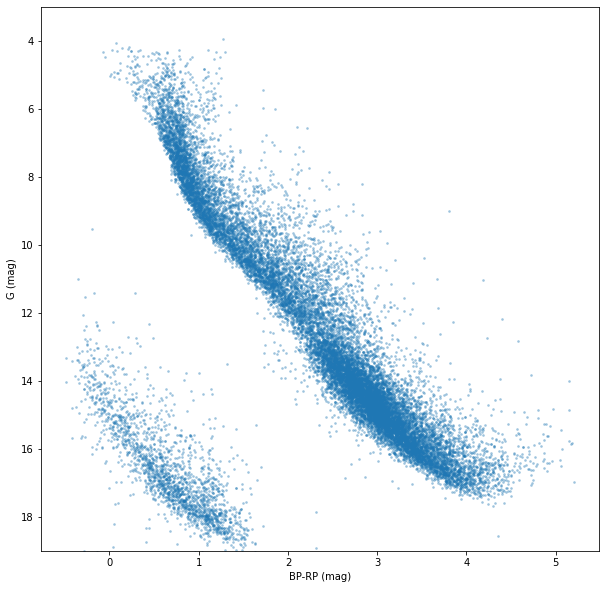

In [17]:
# Plot Gmag vs BP-RP

plt.figure(figsize=(10,10))
plt.scatter(gaia_nearby['bp_rp'], gaia_nearby['gmag'],s=3,alpha=0.3)
plt.xlabel('BP-RP (mag)')
plt.ylabel('G (mag)')
plt.ylim(19,3)
plt.show()



Distance modulus

The distance modulus accounts for the decrease in a source's apparent brightness due to its distance:

m−M=5log10(d/10) ,

where  m  represents the apparent magnitude,  M  is the absolute magnitude, and  d  is in units of pc.

We have parallax (mas), not distance. Rewrite the equation in terms of Gaia parallax using mas units instead of distance.

(double-click here to write your formula here. You can copy the equation above to get the special math formatting code).

In the code cell below, calculate the distance modulus for all stars in our  gaia_nearby  table:

In [18]:
# distance_modulus = 
############################################
# Answer Key
distance_modulus = 5*np.log10(100/gaia_nearby['parallax'])
############################################

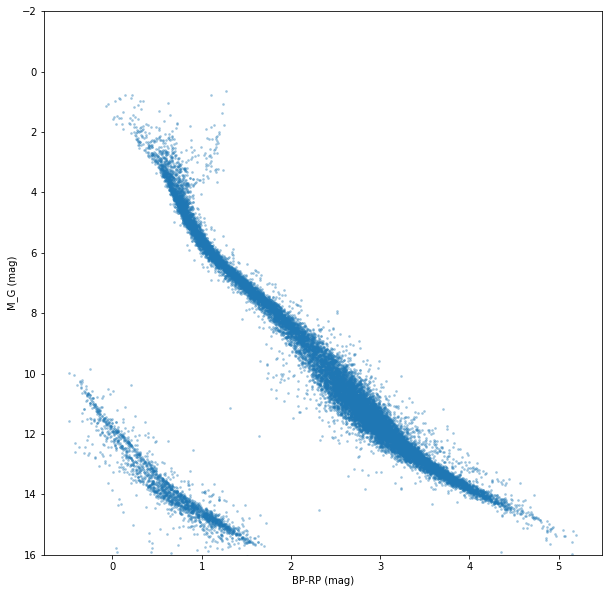

In [19]:
# Plot M_G vs BP-RP
############################################
# Answer Key
plt.figure(figsize=(10,10))
plt.scatter(gaia_nearby['bp_rp'], gaia_nearby['gmag'] - 5*np.log10(100/gaia_nearby['parallax']),s=3,alpha=0.3)
plt.ylim(16,-2)
plt.xlabel('BP-RP (mag)')
plt.ylabel('M_G (mag)')
plt.show()
############################################

Absolute vs. Apparent Magnitudes

Question − Describe the difference between your CMD based on apparent magnitudes and the one based on absolute magnitudes. What would these two CMDs look like if you extended the sample to 100 pc?

The apparent magnitude plot has a much wider spread of stars around the general trends for main sequence and white dwarfs (owing to the non-intrinsic factor of the distance we are observing the stars from). They would be even more spread out at 100pc since there would be a wider range of distances.

Prior to Gaia, astronomers had access to parallaxes for about  105  stars from the Hipparcos mission, its predecessor. Now we now have parallaxes for  ≈2×109  stars, and at significantly higher precision.

Question − Based on your CMDs, discuss why Gaia providing parallaxes for nearly two billion stars is so important for astronomy.

Parallax is one of the most accurate way to measure distance, and knowing the distance to a star is a requirement for accurately interpreting measurements of that star and drawing data based on it. Thus, having parallax measurements for more stars and more kinds of stars greatly increases our ability to make accurate theories about stars.

Stellar Populations

Question − What kind of stars do you see in your CMD?

A through M stars on the main sequence, white dwarfs, and a few on subgiant/giant branch.

Inferring Physical Properties from Photometric Colors and Magnitudes

In [ ]:
# Download the table and format it.
import re
from astropy.table import Table

Mamajek_Table_URL = "http://www.pas.rochester.edu/~emamajek/EEM_dwarf_UBVIJHK_colors_Teff.txt"
#Mamajek_table_raw = Table.read(Mamajek_Table_URL, comment='#', format='ascii.tab',header_start=None, data_start=0,data_end=118)
Mamajek_table_raw = Table.read(Mamajek_Table_URL, comment='#', format='ascii.tab',header_start=None, data_start=0,data_end=87)

n_entries = len(Mamajek_table_raw)
column_names = ["SpT", "Teff", "logT", "BCv", "logL", "Mbol", "R_Rsun", "Mv", "B-V", "Bt-Vt", "G-V", "Bp-Rp", "G-Rp", "M_G", "b-y", "U-B", "V-Rc", "V-Ic", "V-Ks", "J-H", "H-Ks", "M_J", "M_Ks", "Ks-W1", "W1-W2", "W1-W3", "W1-W4", "g-r", "i-z", "z-Y", "Msun", "SpT"]  

import pandas as pd
df = pd.DataFrame(index=range(0),columns=column_names[0:-1])
for i in range(n_entries):
  s = Mamajek_table_raw[i][0]
  row_data = np.array(re.split('\s+', s)[0:-1])
  idots = np.where((row_data == '...') | (row_data == '....') | (row_data == '.....'))[0]
  if len(idots) > 0:
    row_data[idots] = np.nan

  data_to_append = {}
  for j in range(len(df.columns)):
    data_to_append[df.columns[j]] = row_data[j]
  df = df.append(data_to_append, ignore_index = True)

for i in range(1,len(column_names)-1):
  df[column_names[i]] = df[column_names[i]].astype(float)

Mamajek_Table = df

Mamajek_Table

We are going to use the existence of a relationship between radius and magnitude to derive the radii of stars for which we have absolute magnitudes from Gaia. FYI, the Mamajek table is based on observational data (you can skim the original webpage if you wish to see the difficulties involved in assembling it), not theory.

Technically, we are going to misuse the radius-magnitude relationship, because the one we have is for main-sequence stars and we are going to use it to derive radii for white dwarfs, which are definitely not on the main sequence. But we are not going to worry about that here today!

This little interlude is intended to help those of you struggling to answer Problem 1 on the Pset

We need to find a relationship between the mass and luminosity, and another between the luminosity and the effective temperature... these are all quantities included in the table!

In [ ]:
# From Mamajek_Table, plot luminosity vs mass
############################################
# Answer Key
plt.figure(figsize=(10,10))
plt.scatter(Mamajek_Table['Msun'], Mamajek_Table['logL'])
plt.xlabel('Mass')
plt.ylabel('log luminosity')
plt.show()
############################################

In [ ]:
# From Mamajek_Table, plot Teff vs luminosity
############################################
# Answer Key
plt.figure(figsize=(10,10))
plt.scatter(Mamajek_Table['Teff'], Mamajek_Table['logL'])
plt.xlabel('effective temperature (K)')
plt.ylabel('log luminosity')
plt.show()
############################################

In [ ]:
# From Mamajek_Table, plot radius vs M_G 

############################################
# Answer Key
plt.figure(figsize=(10,10))
plt.scatter(Mamajek_Table['M_G'], Mamajek_Table['R_Rsun'])
plt.xlabel('M_G')
plt.ylabel('R')
plt.show()
############################################

In [ ]:
# Find the A stars. 

# According to Mamajek's table, A stars are bluer than BP-RP < 0.327
# They are also brighter than M_G < 2.37

# first, calculate M_G if you haven't already
M_G = gaia_nearby['gmag'] - 5*np.log10(100/gaia_nearby['parallax'])

index_for_Astars = np.where((gaia_nearby['bp_rp'] < 0.327) & 
                            (M_G < 2.37))[0]

# how many A stars on our list? 
print('number of A stars: ',len(index_for_Astars))

# what is the average bp_rp for these stars? Here, let's use median for the average.
print('Average BP-RP color: ', np.median(gaia_nearby['bp_rp'][index_for_Astars]))

# what is the average M_G for these stars? 
# print() # fill in the print command

In [ ]:
# Copy over your CMD code.

# color-code all the stars as 'gray'
# Add in a line to highlight your WDs in 'blue'.

############################################
# Answer Key
plt.figure(figsize=(10,10))
plt.scatter(gaia_nearby['bp_rp'], gaia_nearby['gmag'] - 5*np.log10(100/gaia_nearby['parallax']),s=3,alpha=0.3, c='gray')

index_for_WDs = np.where((gaia_nearby['bp_rp'] < 1.7) & (gaia_nearby['gmag'] - 5*np.log10(100/gaia_nearby['parallax']) > 10))[0]

plt.scatter(gaia_nearby['bp_rp'][index_for_WDs], gaia_nearby['gmag'][index_for_WDs] - 5*np.log10(100/gaia_nearby['parallax'][index_for_WDs]),s=3,alpha=0.3, c='blue')

plt.ylabel('M_G (mag)')
plt.xlabel('BP-RP (mag)')

plt.vlines(0,16,10)
plt.hlines(11.75,-1,1)
plt.ylim(16,-2)
plt.show()
############################################

In [ ]:
# Radius of a white dwarf with the temperature of an A star

############################################
# Answer Key

# At BP-RP = 0: 
#  A1V    9300  3.968 -0.14   1.49   1.02  2.136   1.16  0.035  0.056  0.00   0.005  0.032  1.16   0.017  0.033  0.019  0.044  0.090 -0.025  0.030  1.08   1.07   0.043  -0.036 -0.068 -0.023  -0.210 ...  ...  2.05  A1V   

radius_of_Astar = 2.136
magnitude_of_Astar = 1.16

magnitude_of_WD = 11.75 # by eye

luminosity_ratio = 10**((magnitude_of_Astar - magnitude_of_WD)/2.5)

# stefan-boltzmann ratio: 

radii_ratio = (luminosity_ratio)**(1/2) 
radius_of_WD = radii_ratio * radius_of_Astar

print(radius_of_WD)
############################################

In [ ]:
#Express this radius in terms of the Earth's radius.
# Try using astropy.constants from Assignment #1. If that doesn't work, google the physical constants you need.

# Answer Key
from astropy import constants as const

(const.R_sun / const.R_earth) * radius_of_WD
